In [2]:
import pandas as pd
data = pd.read_csv('Player.csv')
data = data.dropna()
delivery = pd.read_csv('deliveries.csv')
sub_data = delivery.loc[:, ['batsman', 'batsman_runs']]
sub_data1 = sub_data.groupby('batsman', as_index = False).sum()
sub_data1 = sub_data1.sort_values(by=['batsman_runs'], ascending = False)
batsman = sub_data1['batsman'].tolist()
runs = sub_data1['batsman_runs'].tolist()

In [3]:
df_select = delivery.loc[:, ['batsman', 'bowler', 'dismissal_kind']]
dismissal_kinds = ['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']
is_bowler = (df_select['dismissal_kind'] == 'bowled') | (df_select['dismissal_kind'] == 'caught') | (df_select['dismissal_kind'] == 'caught and bowled') | (df_select['dismissal_kind'] == 'stumped') | (df_select['dismissal_kind'] == 'lbw') | (df_select['dismissal_kind'] == 'hit wicket')
bowler_data = df_select[is_bowler].loc[:, ['bowler']]
bowler = bowler_data['bowler'].value_counts().keys().tolist()
wickets = bowler_data['bowler'].value_counts().tolist()


In [4]:
bowl_schema = {'Player':bowler,'Wickets':wickets}
bat_schema = {'Player':batsman,'Runs':runs}
df_bowl = pd.DataFrame(bowl_schema)
df_bat = pd.DataFrame(bat_schema)

In [5]:
df_bowl.head(5)

,Player,Wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147


In [6]:
df_bat.head(5)

,Player,Runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632


# lets merge them to have a better idea of players

In [7]:
df_merged = pd.merge(df_bat,df_bowl,on='Player', how = 'left')
df_merged.columns = ['Player', 'Runs', 'Wickets']

In [8]:
#lets fill the rows having na with 0
df_merged = df_merged.fillna(0)

In [9]:
df_merged.head(10)

,Player,Runs,Wickets
0,V Kohli,5434,4.0
1,SK Raina,5415,25.0
2,RG Sharma,4914,15.0
3,DA Warner,4741,0.0
4,S Dhawan,4632,4.0
5,CH Gayle,4560,18.0
6,MS Dhoni,4477,0.0
7,RV Uthappa,4446,0.0
8,AB de Villiers,4428,0.0
9,G Gambhir,4223,0.0


# lets use the player data to get knowledge about individual players

In [10]:

from datetime import datetime
from datetime import date
def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

data['Age'] = data['DOB'].apply(calculate_age)
data = data.loc[:, ['Player_Name','Age','Batting_Hand','Bowling_Skill','Country']]

# merging both the stats will give better insight and will hep us in rating them

In [11]:
data.columns = ['Player', 'Age', 'Batting Skill', 'Bowling Skill', 'Country']
dataset = pd.merge(df_merged, data, on = 'Player')

In [12]:
dataset.head(10)

,Player,Runs,Wickets,Age,Batting Skill,Bowling Skill,Country
0,V Kohli,5434,4.0,31,Right_Hand,Right-arm medium,India
1,SK Raina,5415,25.0,33,Left_Hand,Right-arm offbreak,India
2,RG Sharma,4914,15.0,33,Right_Hand,Right-arm offbreak,India
3,DA Warner,4741,0.0,33,Left_Hand,Legbreak,Australia
4,S Dhawan,4632,4.0,34,Left_Hand,Right-arm offbreak,India
5,CH Gayle,4560,18.0,40,Left_Hand,Right-arm offbreak,West Indies
6,MS Dhoni,4477,0.0,38,Right_Hand,Right-arm medium,India
7,RV Uthappa,4446,0.0,34,Right_Hand,Right-arm medium,India
8,AB de Villiers,4428,0.0,36,Right_Hand,Right-arm medium,South Africa
9,G Gambhir,4223,0.0,38,Left_Hand,Legbreak,India


# now divide them in the category based on runs and wickets taken

In [13]:
def label_player(row):
    if row['Runs'] > 900  and row['Wickets'] > 30:
        return 'All Rounder'
    elif row['Runs'] > 900:
        return 'Batsman'
    elif row['Wickets'] > 30:
        return 'Bowler'                              
    return 'Other'

In [14]:
# now lets use this categorisation to divide the dataset
dataset['Type'] = dataset.apply(lambda row: label_player(row),axis=1)

# now lets rate the players

In [15]:
def rate_player(row):
    if row['Runs'] < 800:
        bat_value = 2
    elif row['Runs'] >= 800 and row['Runs'] < 1600:
        bat_value = 3
    elif row['Runs'] >= 1600 and row['Runs'] < 2400:
        bat_value = 4
    elif row['Runs'] >= 2400 and row['Runs'] < 3200:
        bat_value = 5
    elif row['Runs'] >= 3200 and row['Runs'] < 3600:
        bat_value = 6
    elif row['Runs'] >= 3600 and row['Runs'] < 4000:
        bat_value = 7
    elif row['Runs'] >= 4000 and row['Runs'] < 4400:
        bat_value = 8
    elif row['Runs'] >= 4400 and row['Runs'] < 4800:
        bat_value = 9
    elif row['Runs'] >= 4800:
        bat_value = 10
    if row['Wickets'] < 15:
        bowl_value = 2
    elif row['Wickets'] >= 15 and row['Wickets'] < 25:
        bowl_value = 3
    elif row['Wickets'] >= 25 and row['Wickets'] < 35:
        bowl_value = 4
    elif row['Wickets'] >= 35 and row['Wickets'] < 55:
        bowl_value = 5
    elif row['Wickets'] >= 55 and row['Wickets'] < 80:
        bowl_value = 6
    elif row['Wickets'] >= 80 and row['Wickets'] < 105:
        bowl_value = 7
    elif row['Wickets'] >= 105 and row['Wickets'] < 130:
        bowl_value = 8
    elif row['Wickets'] >= 130 and row['Wickets'] < 150:
        bowl_value = 9
    elif row['Wickets'] >= 150:
        bowl_value = 10
    if row['Age'] >= 35:
        age_value = 2
    elif row['Age'] >= 35 and row['Age'] < 40:
        age_value = 3
    elif row['Age'] >= 32 and row['Age'] < 35:
        age_value = 4
    elif row['Age'] >= 30 and row['Age'] < 32:
        age_value = 5
    elif row['Age'] >= 28 and row['Age'] < 30:
        age_value = 6
    elif row['Age'] >= 26 and row['Age'] < 28:
        age_value = 7
    elif row['Age'] >= 24 and row['Age'] < 26:
        age_value = 8
    elif row['Age'] >= 22 and row['Age'] < 24:
        age_value = 9
    elif row['Age'] <= 22:
        age_value = 10
    return round(((bat_value + bowl_value + age_value)/3),2)

In [16]:
dataset['Rating'] = dataset.apply(lambda row: rate_player(row),axis=1)

In [17]:
dataset.head(10)

,Player,Runs,Wickets,Age,Batting Skill,Bowling Skill,Country,Type,Rating
0,V Kohli,5434,4.0,31,Right_Hand,Right-arm medium,India,Batsman,5.67
1,SK Raina,5415,25.0,33,Left_Hand,Right-arm offbreak,India,Batsman,6.00
2,RG Sharma,4914,15.0,33,Right_Hand,Right-arm offbreak,India,Batsman,5.67
3,DA Warner,4741,0.0,33,Left_Hand,Legbreak,Australia,Batsman,5.00
4,S Dhawan,4632,4.0,34,Left_Hand,Right-arm offbreak,India,Batsman,5.00
5,CH Gayle,4560,18.0,40,Left_Hand,Right-arm offbreak,West Indies,Batsman,4.67
6,MS Dhoni,4477,0.0,38,Right_Hand,Right-arm medium,India,Batsman,4.33
7,RV Uthappa,4446,0.0,34,Right_Hand,Right-arm medium,India,Batsman,5.00
8,AB de Villiers,4428,0.0,36,Right_Hand,Right-arm medium,South Africa,Batsman,4.33
9,G Gambhir,4223,0.0,38,Left_Hand,Legbreak,India,Batsman,4.00


In [18]:
dataset = dataset.sort_values(by=["Rating"],ascending=False)

In [19]:
dataset.head(10)

,Player,Runs,Wickets,Age,Batting Skill,Bowling Skill,Country,Type,Rating
1,SK Raina,5415,25.0,33,Left_Hand,Right-arm offbreak,India,Batsman,6.00
0,V Kohli,5434,4.0,31,Right_Hand,Right-arm medium,India,Batsman,5.67
2,RG Sharma,4914,15.0,33,Right_Hand,Right-arm offbreak,India,Batsman,5.67
29,RA Jadeja,1951,108.0,31,Left_Hand,Slow left-arm orthodox,India,All Rounder,5.67
11,SR Watson,3614,92.0,38,Right_Hand,Right-arm fast-medium,Australia,All Rounder,5.33
138,B Kumar,190,133.0,30,Right_Hand,Right-arm medium,India,Bowler,5.33
79,PP Chawla,587,149.0,31,Left_Hand,Legbreak,India,Bowler,5.33
68,AR Patel,806,71.0,26,Left_Hand,Slow left-arm orthodox,India,Bowler,5.33
267,Sandeep Sharma,26,83.0,26,Right_Hand,Right-arm medium,India,Bowler,5.33
69,SP Narine,803,122.0,31,Left_Hand,Right-arm offbreak,West Indies,Bowler,5.33


# lets visualise the top players by runs

In [20]:
import seaborn as sns

In [21]:
df1=dataset.head(20)

In [22]:
df1['Runs'] = df1['Runs']/100.0

/Users/ammarpathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df1['Wickets'] = df1['Wickets']/10.0

/Users/ammarpathan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df1 = df1[['Runs', 'Wickets','Rating']]

In [25]:
heatmap1_data = pd.pivot_table(df1, values='Rating', 
                     index=['Runs'], 
                     columns='Wickets')

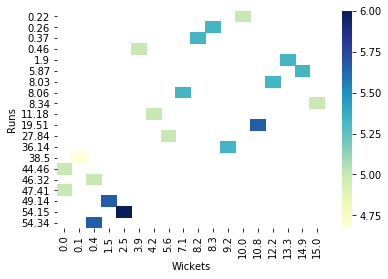

In [26]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

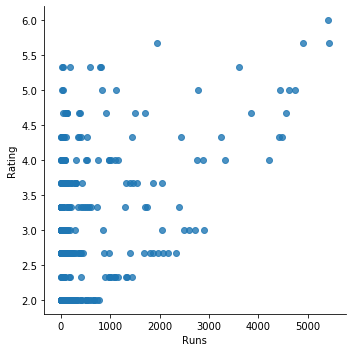

In [27]:
sns.lmplot('Runs', 'Rating', data=dataset, fit_reg=False)

# lets visualise on the basis of wickets

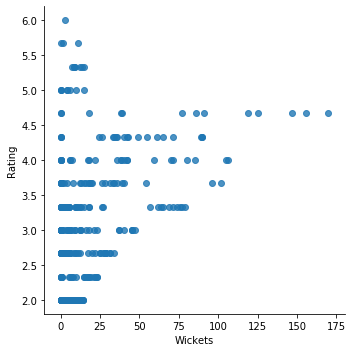

In [28]:
sns.lmplot('Wickets', 'Rating', data=dataset, fit_reg=False)

In [29]:
dataset = dataset.loc[:,['Player', 'Runs', 'Wickets', 'Age', 'Batting Skill','Bowling Skill', 'Country', 'Type', 'Rating']]
max_val = dataset['Rating'].max()
min_val = dataset['Rating'].min()

# lets scale the ratings

In [30]:
values = dataset['Rating'].tolist()
scaled_ratings = [round(((((10.0-0.0)*(x-min_val))/(max_val-min_val))+0.0),2) for x in values]
dataset['Rating'] = scaled_ratings

# lets divide them into category of whether to pick them or not

In [31]:
def buy_type(row):
    if row['Rating'] < 2.5:
        return 'Avoid'
    elif row['Rating'] >= 2.5 and row['Rating'] < 5.0:
        return 'Maybe'
    elif row['Rating'] >= 5.0 and row['Rating'] < 7.5:
        return 'Good Buy'
    else:
        return 'Excellent Purchase'

In [32]:
dataset['Buy type'] = dataset.apply(lambda row: buy_type(row),axis=1)

In [33]:
# now lets look at the dataset 
dataset.head(20)

,Player,Runs,Wickets,Age,Batting Skill,Bowling Skill,Country,Type,Rating,Buy type
1,SK Raina,5415,2.5,33,Left_Hand,Right-arm offbreak,India,Batsman,10.00,Excellent Purchase
0,V Kohli,5434,0.4,31,Right_Hand,Right-arm medium,India,Batsman,9.18,Excellent Purchase
2,RG Sharma,4914,1.5,33,Right_Hand,Right-arm offbreak,India,Batsman,9.18,Excellent Purchase
29,RA Jadeja,1951,10.8,31,Left_Hand,Slow left-arm orthodox,India,All Rounder,9.18,Excellent Purchase
11,SR Watson,3614,9.2,38,Right_Hand,Right-arm fast-medium,Australia,All Rounder,8.32,Excellent Purchase
138,B Kumar,190,13.3,30,Right_Hand,Right-arm medium,India,Bowler,8.32,Excellent Purchase
79,PP Chawla,587,14.9,31,Left_Hand,Legbreak,India,Bowler,8.32,Excellent Purchase
68,AR Patel,806,7.1,26,Left_Hand,Slow left-arm orthodox,India,Bowler,8.32,Excellent Purchase
267,Sandeep Sharma,26,8.3,26,Right_Hand,Right-arm medium,India,Bowler,8.32,Excellent Purchase
69,SP Narine,803,12.2,31,Left_Hand,Right-arm offbreak,West Indies,Bowler,8.32,Excellent Purchase


# now lets try fit a classifier on this so that we dont have to do the evaluation manually we can directly feed it to our system

In [34]:
from sklearn.model_selection import train_test_split

In [35]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
X = dataset.iloc[:, 1:4].values
Y = dataset.iloc[:,9].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 40)

model = RandomForestClassifier()
model1 = XGBClassifier()
model.fit(X_train, Y_train)
model1.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_pred_1 = model1.predict(X_test)

/Users/ammarpathan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# lets evaluate the accuracy of our classification model so that we can confirm if we can use it for future evaluation

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print ("RANDOM FOREST")
print (cm)
from sklearn.metrics import accuracy_score
print(round(accuracy_score(Y_test, y_pred),2)*100,"% Accuracy")
cm1 = confusion_matrix(Y_test, y_pred_1)
print ("XGBOOST")
print (cm1)
print(round(accuracy_score(Y_test, y_pred_1),2)*100,"% Accuracy")

RANDOM FOREST
[[60  0  0  1]
 [ 1  2  2  3]
 [ 0  1 12  4]
 [ 3  1  1 29]]
86.0 % Accuracy
XGBOOST
[[60  0  0  1]
 [ 1  2  3  2]
 [ 0  0 14  3]
 [ 2  3  0 29]]
88.0 % Accuracy


In [37]:
auction = pd.read_csv('cricbuzz_ipl.csv')

In [38]:
auction.head(10)

,sold_to,player,role,final_price,sold_or_not,base_price
0,RR,Ben Stokes,Bowling Allrounder • England,12.50 Crore,SOLD,2.00 Crore
1,RR,Jaydev Unadkat,Bowler • India,11.50 Crore,SOLD,1.50 Crore
2,SRH,Manish Pandey,Batsman • India,11.00 Crore,SOLD,1.00 Crore
3,KXIP,Lokesh Rahul,WK-Batsman • India,11.00 Crore,SOLD,2.00 Crore
4,KKR,Chris Lynn,Batsman • Australia,9.60 Crore,SOLD,2.00 Crore
5,KKR,Mitchell Starc,Bowler • Australia,9.40 Crore,SOLD,2.00 Crore
6,DD,Glenn Maxwell,Batting Allrounder • Australia,9.00 Crore,SOLD,2.00 Crore
7,SRH,Rashid Khan,Bowler • Afghanistan,9.00 Crore,NaN,2.00 Crore
8,MI,Krunal Pandya,Batting Allrounder • India,8.80 Crore,NaN,40.00 Lakh
9,RR,Sanju Samson,WK-Batsman • India,8.00 Crore,SOLD,1.00 Crore


In [39]:
import numpy as np

In [40]:
auction = auction.replace(np.nan, 'NOT SOLD')

In [41]:
auction.head(10)

,sold_to,player,role,final_price,sold_or_not,base_price
0,RR,Ben Stokes,Bowling Allrounder • England,12.50 Crore,SOLD,2.00 Crore
1,RR,Jaydev Unadkat,Bowler • India,11.50 Crore,SOLD,1.50 Crore
2,SRH,Manish Pandey,Batsman • India,11.00 Crore,SOLD,1.00 Crore
3,KXIP,Lokesh Rahul,WK-Batsman • India,11.00 Crore,SOLD,2.00 Crore
4,KKR,Chris Lynn,Batsman • Australia,9.60 Crore,SOLD,2.00 Crore
5,KKR,Mitchell Starc,Bowler • Australia,9.40 Crore,SOLD,2.00 Crore
6,DD,Glenn Maxwell,Batting Allrounder • Australia,9.00 Crore,SOLD,2.00 Crore
7,SRH,Rashid Khan,Bowler • Afghanistan,9.00 Crore,NOT SOLD,2.00 Crore
8,MI,Krunal Pandya,Batting Allrounder • India,8.80 Crore,NOT SOLD,40.00 Lakh
9,RR,Sanju Samson,WK-Batsman • India,8.00 Crore,SOLD,1.00 Crore


In [42]:
auction_select = auction[['player','final_price']]

In [43]:
auction_select.head(10)

,player,final_price
0,Ben Stokes,12.50 Crore
1,Jaydev Unadkat,11.50 Crore
2,Manish Pandey,11.00 Crore
3,Lokesh Rahul,11.00 Crore
4,Chris Lynn,9.60 Crore
5,Mitchell Starc,9.40 Crore
6,Glenn Maxwell,9.00 Crore
7,Rashid Khan,9.00 Crore
8,Krunal Pandya,8.80 Crore
9,Sanju Samson,8.00 Crore


In [44]:
dataset.head(10)

,Player,Runs,Wickets,Age,Batting Skill,Bowling Skill,Country,Type,Rating,Buy type
1,SK Raina,5415,2.5,33,Left_Hand,Right-arm offbreak,India,Batsman,10.00,Excellent Purchase
0,V Kohli,5434,0.4,31,Right_Hand,Right-arm medium,India,Batsman,9.18,Excellent Purchase
2,RG Sharma,4914,1.5,33,Right_Hand,Right-arm offbreak,India,Batsman,9.18,Excellent Purchase
29,RA Jadeja,1951,10.8,31,Left_Hand,Slow left-arm orthodox,India,All Rounder,9.18,Excellent Purchase
11,SR Watson,3614,9.2,38,Right_Hand,Right-arm fast-medium,Australia,All Rounder,8.32,Excellent Purchase
138,B Kumar,190,13.3,30,Right_Hand,Right-arm medium,India,Bowler,8.32,Excellent Purchase
79,PP Chawla,587,14.9,31,Left_Hand,Legbreak,India,Bowler,8.32,Excellent Purchase
68,AR Patel,806,7.1,26,Left_Hand,Slow left-arm orthodox,India,Bowler,8.32,Excellent Purchase
267,Sandeep Sharma,26,8.3,26,Right_Hand,Right-arm medium,India,Bowler,8.32,Excellent Purchase
69,SP Narine,803,12.2,31,Left_Hand,Right-arm offbreak,West Indies,Bowler,8.32,Excellent Purchase


In [45]:
auction_select.rename(columns = {'player':'Player'}, inplace = True) 

/Users/ammarpathan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [46]:
auction_select.head(10)

,Player,final_price
0,Ben Stokes,12.50 Crore
1,Jaydev Unadkat,11.50 Crore
2,Manish Pandey,11.00 Crore
3,Lokesh Rahul,11.00 Crore
4,Chris Lynn,9.60 Crore
5,Mitchell Starc,9.40 Crore
6,Glenn Maxwell,9.00 Crore
7,Rashid Khan,9.00 Crore
8,Krunal Pandya,8.80 Crore
9,Sanju Samson,8.00 Crore


In [47]:
df3 = dataset[['Player','Rating']]

In [48]:
df3.head(10)

,Player,Rating
1,SK Raina,10.00
0,V Kohli,9.18
2,RG Sharma,9.18
29,RA Jadeja,9.18
11,SR Watson,8.32
138,B Kumar,8.32
79,PP Chawla,8.32
68,AR Patel,8.32
267,Sandeep Sharma,8.32
69,SP Narine,8.32


# if we look at the rating and auction price of the players we can see the top picked players are not the ones who are performing very according to our rubric